# Testing basic operators in package `Whirl`

In [1]:
include(joinpath(Pkg.dir("Whirl"), "src/Whirl.jl"))
#import Whirl
#import Whirl:@get
using Whirl
#@get Whirl (Systems, Grids, DualPatch, Bodies, TimeMarching, NavierStokes, Fields);

In [8]:
using Plots
pyplot()
clibrary(:colorbrewer)
default(grid = false)

### Testing body-to-field operations

In [12]:
ddf.([-1,0,1])

3-element Array{Float64,1}:
 0.166667
 0.666667
 0.166667

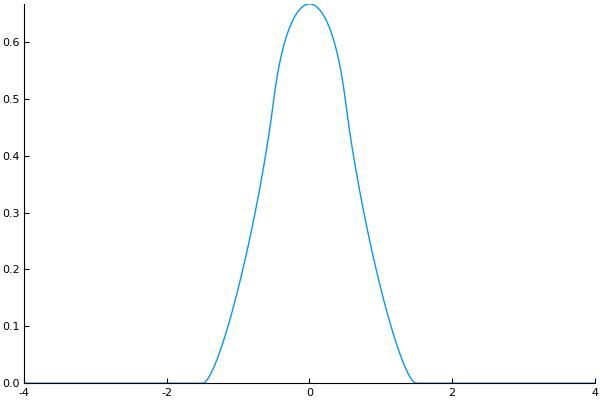

In [11]:
ddf = DDF(ddftype=Fields.Roma);
x = linspace(-4,4,401);
plot(x,ddf.(x),legend=false)

In [13]:
x = [0.25,0.75,0.25]; y = [0.75,0.25,0.25];
X = VectorData(x,y);
q = Edges(Primal,(12,12));
dx = 0.1;
H = Regularize(x,y,dx)

Regularization operator with 3 points

#### Set up a circle of points

In [25]:
n = 100;
θ = linspace(0,2π,n+1);
x = 0.5 + 0.25*cos.(θ[1:n])
y = 0.5 + 0.25*sin.(θ[1:n])
ds = 2π/n*0.25;
X = VectorData(x,y);

#### Set up the physical dimensions of the grid and create empty data

In [26]:
nx = 102; ny = 102;
Lx = 1.0;
dx = Lx/(nx-2);
q = Edges(Primal,(nx,ny));
w = Nodes(Dual,(nx,ny));
w̃ = Nodes(Primal,w);
p = Edges(Dual,w);

#### Create a regularization operator with the point data

In [27]:
H = Regularize(X,dx)

Regularization operator with 100 points

#### Now set up some data on the points and regularize it to primal edge data on the grid 

In [28]:
f = VectorData(X)
fill!(f.u,1.0);
f.v .= X.v.-0.5;

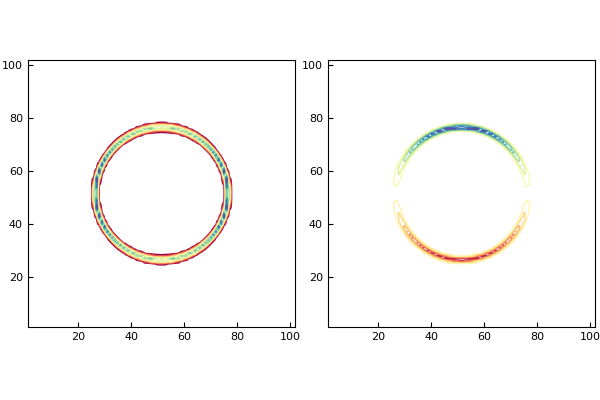

In [29]:
H(q,f,ds);
plot(q)

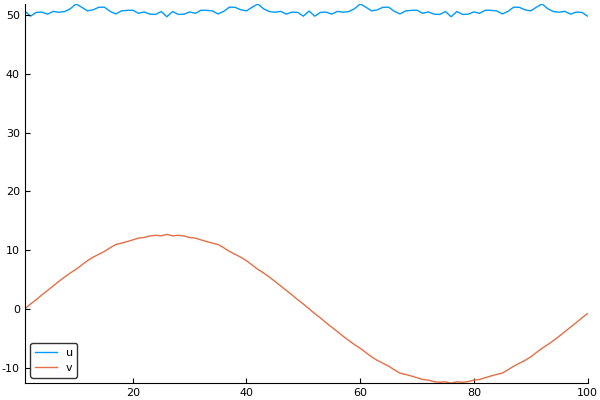

In [24]:
f2 = VectorData(X);
H(f2,q);
plot(f2.u,lab="u")
plot!(f2.v,lab="v")

In [6]:
f = VectorData(X)
f.u[40] = 1.0

1.0

[0.0, 0.0, 0.00704579, 5.66445, 40.2699, 5.76262, 0.0, 0.0, 0.0]


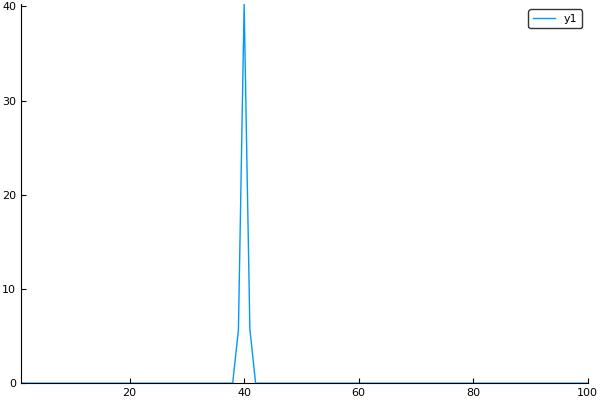

In [7]:
H(f,H(q,f,ds))
println(f.u[36:44])
plot(f.u)

#### Vector data onto dual edge field

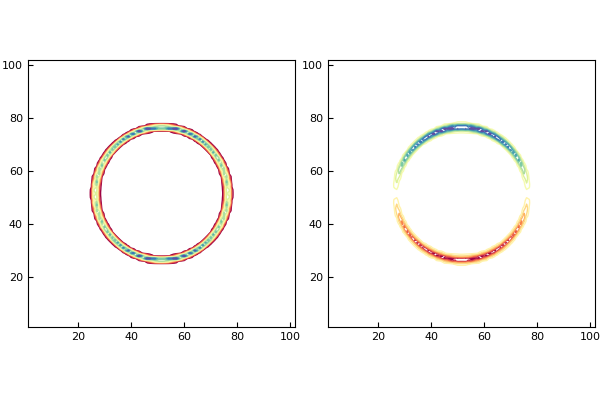

In [30]:
H(p,f);
plot(p)

#### Vector data onto primal and dual nodal data

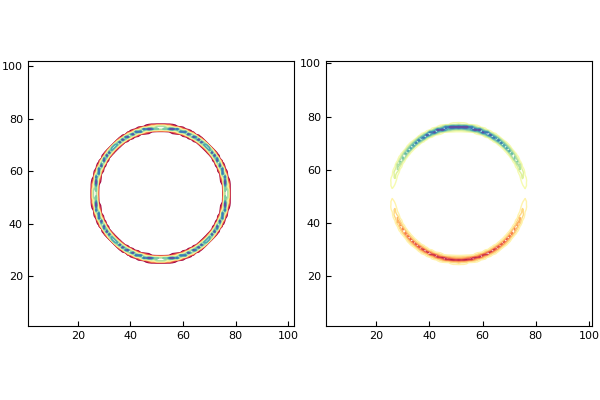

/Users/jeff/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label'
  s)


In [8]:
H((w,w̃),f);
plot(plot(w),plot(w̃))

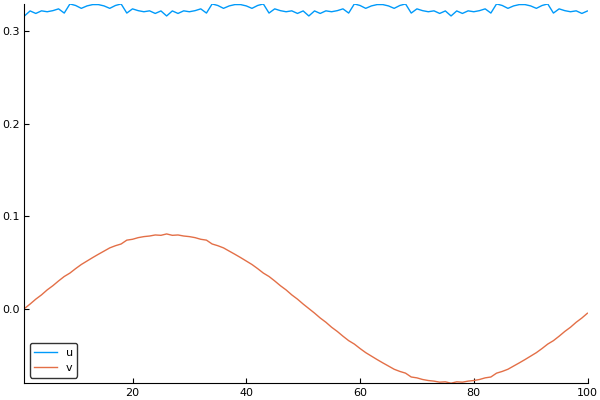

In [10]:
f2 = VectorData(X);
H(f2,(w,w̃));
plot(f2.u,lab="u")
plot!(f2.v,lab="v")

#### Scalar data onto dual nodal field

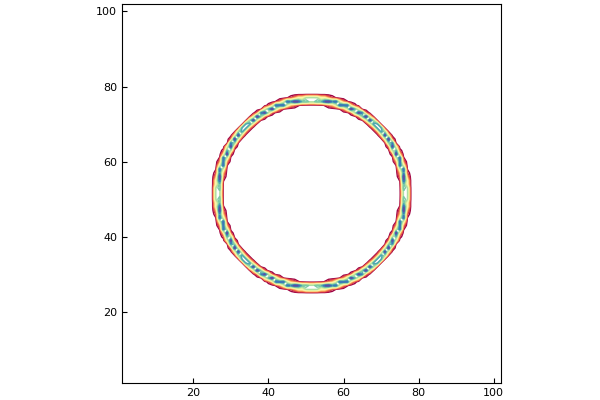

In [21]:
g = ScalarData(X)
fill!(g,1.0)
H(w,g)
plot(w)

In [12]:
g[1:10]

10-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

#### Scalar data onto primal nodal field

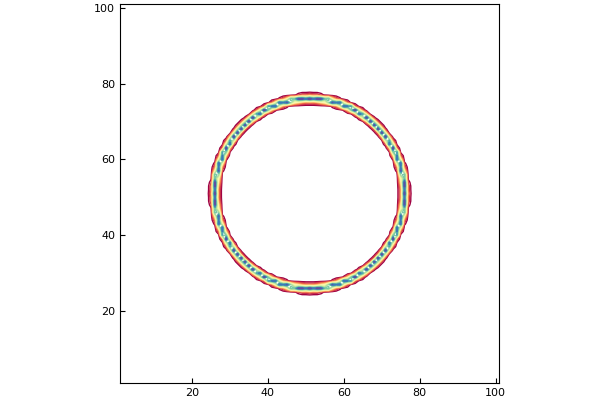

In [13]:
H(w̃,g)
plot(w̃)

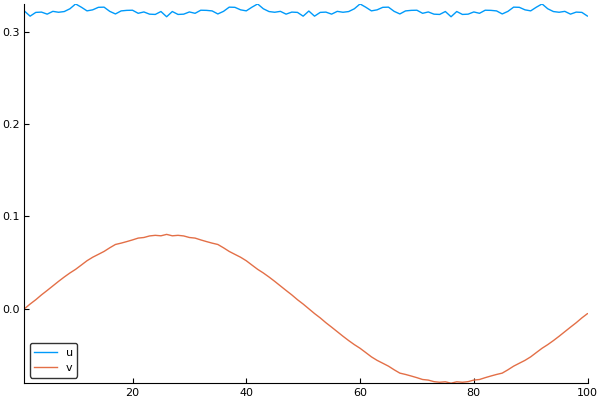

In [49]:
f2 = VectorData(X);
H(f2,q)
plot(f2.u,lab="u")
plot!(f2.v,lab="v")

In [50]:
function fcn!((x,y)::Tuple{Float64})
    println(x)
end

LoadError: [91msyntax: "(x,y)" is not a valid function argument name[39m

### Testing new field types and operators

In [2]:
i = 5; j = 5;

In [3]:
nx = 12; ny = 12;

In [2]:
w = Nodes(Dual,(5,4))
w .= reshape(1:20,5,4)
w∘w
C = Curl()
D = Divergence()
D*(C*w)

Whirl.Fields.Nodes{Whirl.Fields.Primal,5,4} data
Printing in grid orientation (lower left is (1,1)):
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [5]:
w

Whirl.Fields.Nodes{Whirl.Fields.Dual,5,4} data
Printing in grid orientation (lower left is (1,1)):
 16.0  17.0  18.0  19.0  20.0
 11.0  12.0  13.0  14.0  15.0
  6.0   7.0   8.0   9.0  10.0
  1.0   2.0   3.0   4.0   5.0

In [28]:
w = Nodes(Dual,(12,12));
w[4,4] = 1.0;
q = Edges(Primal,w)
curl!(q,w)

Whirl.Fields.Edges{Whirl.Fields.Primal,12,12} data
u (in grid orientation):
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
v (in grid orientation):
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0

In [7]:
typeof((Nodes(Primal,(8,6)),Nodes(Primal,(8,6))))

Tuple{Whirl.Fields.Nodes{Whirl.Fields.Primal,8,6},Whirl.Fields.Nodes{Whirl.Fields.Primal,8,6}}

In [6]:
q = Edges(Dual,(8,6));
p = deepcopy(q);
q.u[3,2] = 0.3;
p.u[3,2] = 0.2;
p∘q

Whirl.Fields.Edges{Whirl.Fields.Dual,8,6} data
u (in grid orientation):
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.06  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
v (in grid orientation):
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [10]:
q = Edges{Dual, 5, 4}()
q.u .= reshape(1:16, 4, 4)
q.v .= reshape(1:15, 5, 3)
v = Edges{Primal, 5, 4}()
Fields.shift!(v,q)
v.v

4×4 Array{Float64,2}:
 0.0  4.0   9.0  0.0
 0.0  5.0  10.0  0.0
 0.0  6.0  11.0  0.0
 0.0  7.0  12.0  0.0

In [5]:
nx = 100; ny = 100;
i = 40; j = 50;
w = Nodes(Dual,(nx,ny))
w[i,j] = 1.0
E = IntFact(5,w)
E25 = IntFact(2.5,w)

Integrating factor with parameter 2.5 on a (nx = 100, ny = 100) grid

In [6]:
E25*(E25*w)≈E*w

true

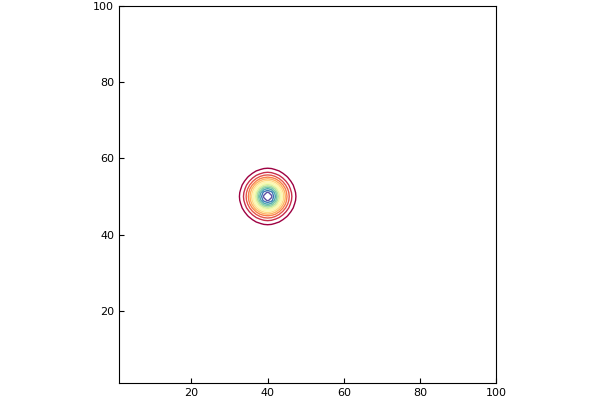

In [11]:
plot(E*w)

In [4]:
cellzero = Nodes(Dual,(nx,ny))
nodezero = Nodes(Primal,cellzero)
facezero = Edges(Primal,cellzero)
dualfacezero = Edges(Dual,cellzero)

cellunit = deepcopy(cellzero)
cellunit[i,j] = 1.0

1.0

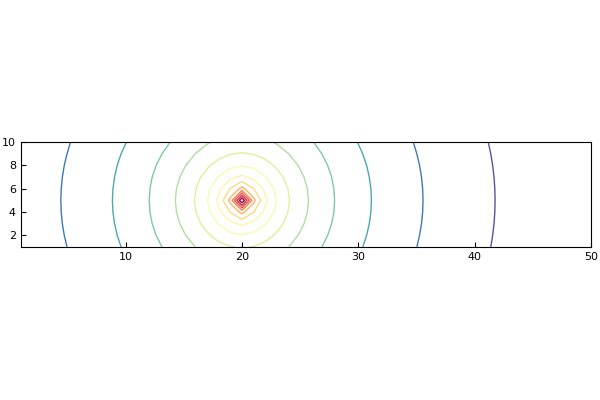

In [15]:
w = Nodes(Dual,(50,10));
w[20,5] = 1.0
L = Laplacian(w,with_inverse=true)
plot(L\w)

In [7]:
C*w

Whirl.Fields.Edges{Whirl.Fields.Primal,7,7} data
u (in grid orientation):
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  -1.0  0.0  0.0  0.0
 0.0  0.0  0.0   1.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
v (in grid orientation):
 0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  -1.0  1.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0

In [11]:
import Base:*

In [12]:
function (*)(C::Curl,w::Nodes{Dual,NX,NY}) where {NX,NY}
    curl!(Edges(Primal, w),w)
end

* (generic function with 185 methods)

In [16]:
C = Curl()
C*w

Whirl.Fields.Edges{Whirl.Fields.Primal,7,7} data
u (in grid orientation):
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  -1.0  0.0  0.0  0.0
 0.0  0.0  0.0   1.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
v (in grid orientation):
 0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  -1.0  1.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0

In [19]:
L*s ≈ w

true

In [8]:
Nodes(Primal,cellunit)

Whirl.Fields.Nodes{Whirl.Fields.Primal,12,12} data
Printing in grid orientation (lower left is (1,1)):
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [18]:
typeof(nodeunit).parameters[2:3]

svec(12, 12)

In [397]:
w = Fields.Nodes{Fields.Dual, 5, 4}()
w .= reshape(1:20, 5, 4)
Ww = Fields.shift(w)

Whirl.Fields.Dual edge data
u (in grid orientation):
4×4 Array{Float64,2}:
  0.0   0.0   0.0   0.0
 11.5  12.5  13.5  14.5
  6.5   7.5   8.5   9.5
  0.0   0.0   0.0   0.0
v (in grid orientation):
3×5 Array{Float64,2}:
 0.0  14.5  15.5  16.5  0.0
 0.0   9.5  10.5  11.5  0.0
 0.0   4.5   5.5   6.5  0.0

In [328]:
s = Fields.Nodes{Fields.Dual, 5, 4}()
s .= rand(5, 4)
Fields.divergence(Fields.curl(s))

Whirl.Fields.Nodes{Whirl.Fields.Primal,5,4} data
Printing in grid orientation (lower left is (1,1)):
4×5 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [317]:
v = Fields.Nodes(Fields.Dual,(12,12))
v[i,j] = 1.0
v

Whirl.Fields.Nodes{Whirl.Fields.Dual,12,12} data
Printing in grid orientation (lower left is (1,1)):
12×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [449]:
L = Fields.Laplacian(nx,ny;with_inverse=true)

Discrete Laplacian (and inverse) on a (nx = 12, ny = 12) grid

In [467]:
faceones = deepcopy(facezero)
fill!(cellones,1.0)

Whirl.Fields.Nodes{Whirl.Fields.Dual,12,12} data
Printing in grid orientation (lower left is (1,1)):
12×12 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [458]:
w = L*(L\cellunit)

1.0000000000000002

In [254]:
w = Fields.Nodes(Fields.Primal,v)
w[i,j] = 1.0
Fields.gradient(w)

Whirl.Fields.Primal edge data
u (in grid orientation):
11×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
v (in grid orientation):
12×11 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0

In [320]:
q = Fields.Edges(Fields.Dual,v)
q.u[i,j] = 1.0
dq = Fields.gradient(q)
dq.dudy

Whirl.Fields.Nodes{Whirl.Fields.Primal,12,12} data
Printing in grid orientation (lower left is (1,1)):
11×11 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

### Create a domain

In [92]:
xmin = [-1.0,-1.0]
xmax = [1.0,1.0]
dom = Systems.DualDomain(xmin,xmax)

Domain: xmin = [-1.0, -1.0], xmax = [1.0, 1.0]
number of bodies = 0


#### Add a filling dual grid to this domain
The boundaries of the domain coincide with the boundaries of the dual grid

In [93]:
Δx = 0.2
dom = Systems.add_grid(dom,Δx)

Domain: xmin = [-1.0, -1.0], xmax = [1.0, 1.0]
number of bodies = 0
Grid: number of cells = (10,10), Δx = 0.2, xmin = [-1.0, -1.0], xmax = [1.0, 1.0]



### Grid operators

Create some basic grid vectors: zero vectors, uniform one vectors, and "grid unit vectors": a bunch of cell data with zeros everywhere except at one point. These are useful for several steps below.

In [94]:
i = 5; j = 5;
cellzero = zeros(dom.grid.cell);
cellones = ones(dom.grid.cell);
cellunit = copy(cellzero)
cellunit[i,j] = 1.0;
facexzero = zeros(dom.grid.facex);
facexones = zeros(dom.grid.facex);
facexunit = copy(facexzero)
facexunit[i,j] = 1.0;
faceyzero = zeros(dom.grid.facey);
faceyones = ones(dom.grid.facey);
faceyunit = copy(faceyzero)
faceyunit[i,j] = 1.0;
cellzero = zeros(dom.grid.cell);
cellones = ones(dom.grid.cell);
cellunit = copy(cellzero)
cellunit[i,j] = 1.0;
nodezero = zeros(dom.grid.node);
nodeones = ones(dom.grid.node);
nodeunit = copy(nodezero)
nodeunit[i,j] = 1.0;
dualfacexzero = zeros(dom.grid.dualfacex);
dualfacexones = zeros(dom.grid.dualfacex);
dualfacexunit = copy(dualfacexzero)
dualfacexunit[i,j] = 1.0;
dualfaceyzero = zeros(dom.grid.dualfacey);
dualfaceyones = ones(dom.grid.dualfacey);
dualfaceyunit = copy(dualfaceyzero)
dualfaceyunit[i,j] = 1.0;

#### Laplacian of dual cell center data

In [57]:
lapcell = Grids.lap(dom.grid,cellunit)
flipdim(lapcell',1)

12×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

#### Curl of dual cell center data

In [53]:
curlx,curly = Grids.curl(dom.grid,cellunit)
flipdim(curlx',1)

11×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [64]:
flipdim(curly',1)

12×11 Array{Float64,2}:
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  -1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

#### Gradient of dual cell node data

In [62]:
qx,qy = Grids.grad(dom.grid,nodeunit)
flipdim(qx',1)

11×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [63]:
flipdim(qy',1)

12×11 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

#### Face data curl

In [67]:
cellcurl = Grids.curl(dom.grid,facexunit,faceyzero)
flipdim(cellcurl',1)

12×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [68]:
cellcurl = Grids.curl(dom.grid,facexzero,faceyunit)
flipdim(cellcurl',1)

12×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

#### Face data divergence

In [70]:
nodediv = Grids.diverg(dom.grid,facexunit,faceyzero)
flipdim(nodediv',1)

11×11 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

#### Face data Laplacian

In [72]:
lapqx,lapqy = Grids.lap(dom.grid,facexunit,faceyzero)
flipdim(lapqx',1)

11×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [81]:
lapqx,lapqy = Grids.lap(dom.grid,facexzero,faceyunit)
flipdim(lapqy',1)

12×11 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

#### Dual face data divergence

In [147]:
celldiv = Grids.dualdiverg(dom.grid,dualfacexunit,dualfaceyzero)
flipdim(celldiv',1)
celldiv[i,j] = celldiv[i+1,j] = 0.0
all(celldiv.==0.0)

true

#### Shift face data to dual face data

In [148]:
qx, qy = Grids.shift(dom.grid,facexunit,faceyzero)
flipdim(qx',1)

12×11 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.25  0.25  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.25  0.25  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0

In [150]:
qx, qy = Grids.shift(dom.grid,facexzero,faceyunit)
flipdim(qy',1)

11×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.25  0.25  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.25  0.25  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0

#### Shift dual cell center data to dual face data

In [87]:
qx, qy = Grids.shift(dom.grid,cellunit)
flipdim(qx',1)

12×11 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.5  0.5  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

#### Shift face data to dual cell center data

In [89]:
cellx = Grids.dualshiftx(dom.grid,facexunit)
flipdim(cellx',1)

12×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [95]:
celly = Grids.dualshifty(dom.grid,faceyunit)
flipdim(celly',1)

12×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.5  0.5  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

### Testing composite operations

#### Divergence of a curl

In [98]:
maximum(abs.(Grids.diverg(dom.grid,Grids.curl(dom.grid,cellunit))))==0.0

true

#### Curl of the gradient

In [99]:
maximum(abs.(Grids.curl(dom.grid,Grids.grad(dom.grid,nodeunit))))==0.0

true

###  LGF and integrating factor

In [102]:
# Set up the LGF and integrating factor tables
@time Grids.lgf_table!(dom.grid);
α = 5.0
@time Grids.q_table!(dom.grid,α);

  0.002609 seconds (1.94 k allocations: 2.125 MiB)
  0.000277 seconds (3.38 k allocations: 79.375 KiB)


In [108]:
# This is the discrete convolution of the LGF with the grid unit vector
@time s = Grids.L⁻¹(dom.grid)(cellunit);

  0.000044 seconds (14 allocations: 10.422 KiB)


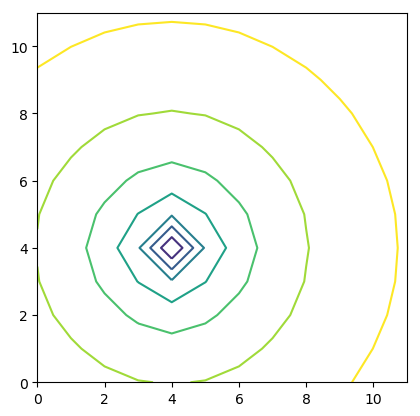

(0.0, 11.0, 0.0, 11.0)

In [110]:
# plot this
contour(s)
axis("scaled")

In [113]:
laps = Grids.lap(dom.grid,s)
laps[i,j]≈1.0

true

### Create a body

In [2]:
Npts = 100
rad = 0.5
xcent = [0.0,0.0]
ang = 0.0
b = Bodies.Circle(Npts,rad,xcent,ang)

Body: number of points = 100, reference point = (0.0,0.0), rotation matrix = [1.0 -0.0; 0.0 1.0]
     max spacing between points = 0.03141075907812899
     min spacing between points = 0.03141075907812807


In [ ]:
dom = Systems.add_body(dom,b)

### Construct grid and body-grid operators

In [27]:
# This is the discrete convolution of the integrating factor with the grid unit vector
# The result is just the integrating factor field, but shifted to the center specified
# in the grid unit vector.
@time s = Grids.Q(dom.grid)(wunit);

  0.139277 seconds (120.97 k allocations: 7.536 MiB)


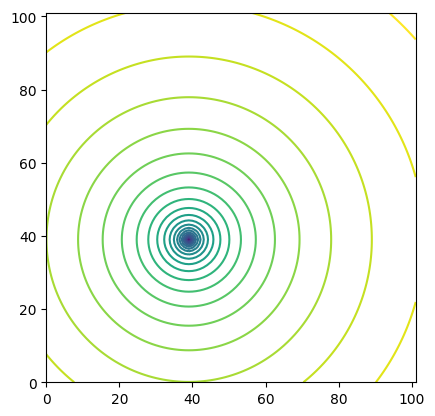

(0.0, 101.0, 0.0, 101.0)

In [15]:
# plot this
contour(s,31)
axis("scaled")

#### Construct and plot the C<sup>T</sup> E<sub>y</sub><sup>T</sup> operator

In [5]:
@time Systems.construct_CᵀEᵀ!(dom)

Computing Eᵀ...100%|████████████████████████████████████| Time: 0:00:01


  5.011396 seconds (2.45 M allocations: 356.706 MiB, 1.69% gc time)


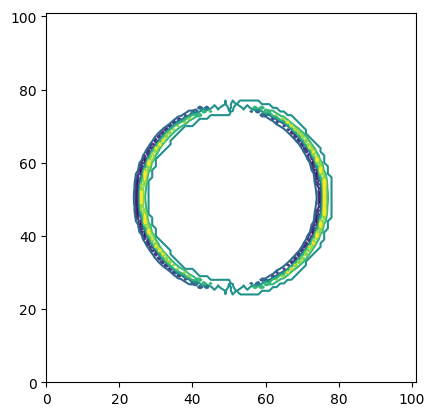

(0.0, 101.0, 0.0, 101.0)

In [17]:
contour(reshape(dom.CᵀEᵀ[1]*ones(dom.nbodypts),size(dom.grid.cell)))
axis("scaled")

In [35]:
# Create a "grid unit vector": a bunch of cell data with zeros everywhere except at one point.
# This is useful for visualizing the LGF and the integrating factor
wxunit = zeros(dom.grid.facex);
wxunit[4,4] = 1.0;
wyunit = zeros(dom.grid.facey);
wyunit[1,1] = 1.0;

In [36]:
wxunit

6×5 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [41]:
dualshiftx(dom.grid,wxunit)

6×6 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.5  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

In [40]:
function dualshiftx!(vx,ir::UnitRange{Int},jr::UnitRange{Int},facex)
    irx = ir.start:ir.stop
    jry = jr.start:jr.stop-1
    @. vx[irx,jry] = 0.5(facex[irx,jry]+facex[irx,jry+1])
    # @. vy[ir,jry] = 0.5(facey[ir,jry]+facey[ir+1,jry])
    nothing
end
function dualshiftx(g::DualPatch,facex)
    cellx = zeros(g.cell)
    dualshiftx!(cellx,g.facexint[1],g.facexint[2],facex)
    cellx
end

dualshiftx (generic function with 1 method)